# Car Type prediction

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn import cluster 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import cluster 
import warnings
warnings.filterwarnings("ignore")
from datetime import date
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_table("cars-origin.txt",sep="\t",header=0,index_col=0)

# Data visualisation

<AxesSubplot:xlabel='mpg'>

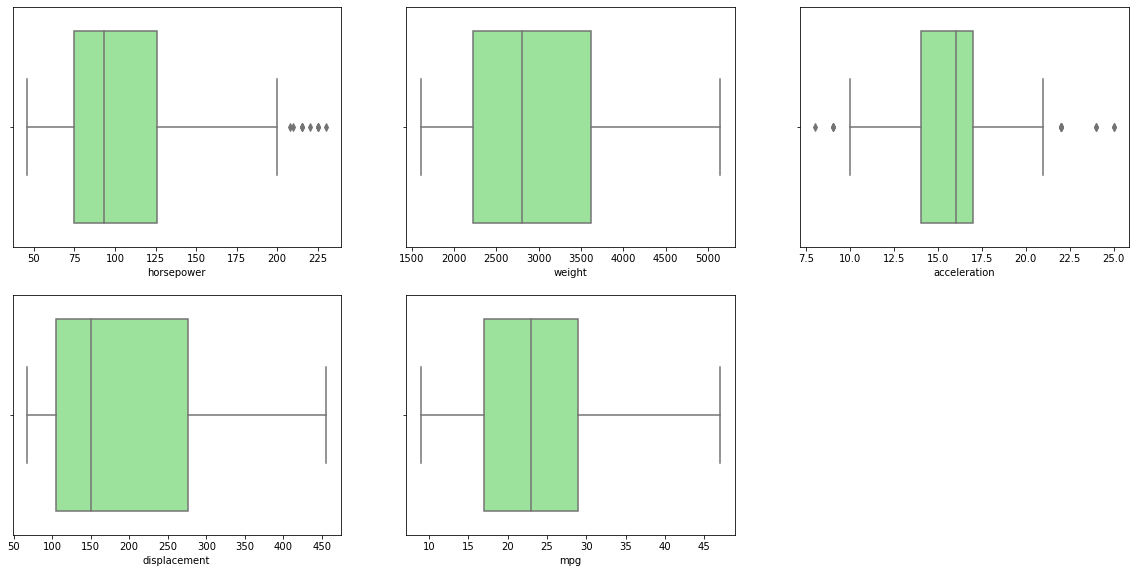

In [3]:
#using boxplots to visualise the outliers 
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.boxplot(x= data['horsepower'], color='lightgreen')

plt.subplot(3,3,2)
sns.boxplot(x= data['weight'], color='lightgreen')

plt.subplot(3,3,3)
sns.boxplot(x=data['acceleration'], color='lightgreen')

plt.subplot(3,3,4)
sns.boxplot(x=data['displacement'], color='lightgreen')

plt.subplot(3,3,5)
sns.boxplot(x=data['mpg'], color='lightgreen')

# Data Cleaning

In [4]:
data

,mpg,displacement,horsepower,weight,acceleration,origin
Numero,,,,,,
1,35,72,69,1613,18,asian
2,31,76,52,1649,17,asian
3,39,79,58,1755,17,asian
4,35,81,60,1760,16,asian
5,31,71,65,1773,19,asian
...,...,...,...,...,...,...
388,12,455,225,4951,11,american
389,12,429,198,4952,12,american
390,12,383,180,4955,12,american


In [5]:
data.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'origin'],
      dtype='object')

In [6]:
data.shape

(392, 6)

In [7]:
data['horsepower'].unique()

array([ 69,  52,  58,  60,  65,  53,  66,  71,  46,  62,  67,  49,  64,
        80,  70,  78,  68,  74,  48,  61,  63,  76,  83,  88,  75,  90,
        86,  81,  95, 113,  54,  79,  92,  72,  84,  96,  97,  85,  94,
        93, 100, 107,  91, 115, 110,  87,  82, 105,  89, 122, 103, 112,
       116, 132, 108, 120,  98, 225, 125, 102, 129, 139, 150, 133, 145,
       165, 140, 130,  77, 170, 160, 180, 175, 135, 190, 138, 137, 142,
       153, 152, 230, 215, 149, 198, 220, 155, 158, 200, 210, 208, 148,
       193, 167], dtype=int64)

In [8]:
data.nunique()

mpg              37
displacement     80
horsepower       93
weight          346
acceleration     17
origin            3
dtype: int64

In [9]:
data.isnull().sum()

mpg             0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [10]:
def data_processing():
    cars = pd.read_table("cars-origin.txt",sep="\t",header=0,index_col=0)
    categorical_feature= cars.dtypes==object
    categorical_columns = cars.columns[categorical_feature].tolist()
    LE =LabelEncoder()
    #cars = pd.get_dummies(cars, columns=['origin'])
    cars[categorical_columns] = cars[categorical_columns].apply(lambda col: LE.fit_transform(col))
    #cars = cars.drop('horsepower',axis = 1)
    
    return cars

In [11]:
dataP = data_processing()

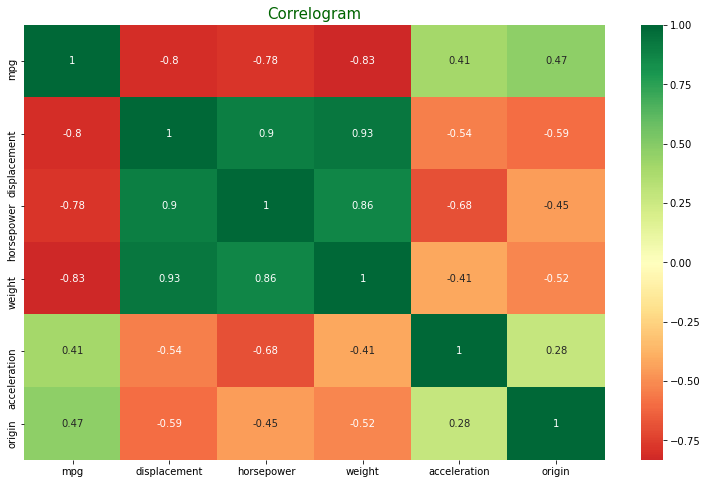

In [12]:
corr = dataP.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [13]:
dataP

,mpg,displacement,horsepower,weight,acceleration,origin
Numero,,,,,,
1,35,72,69,1613,18,1
2,31,76,52,1649,17,1
3,39,79,58,1755,17,1
4,35,81,60,1760,16,1
5,31,71,65,1773,19,1
...,...,...,...,...,...,...
388,12,455,225,4951,11,0
389,12,429,198,4952,12,0
390,12,383,180,4955,12,0


In [14]:
Y = dataP['mpg']

In [15]:
X = dataP.drop(['mpg'],axis = 1)

In [16]:
#scaling
"""RBS = RobustScaler()
transformer = RBS.fit(X)
SCX = transformer.transform(X)"""
sc = StandardScaler()
Z= sc.fit_transform(X)

In [17]:
Y.shape

(392,)

# Modeling 

In [18]:
X_train, X_test, y_train, y_test =train_test_split(Z, Y,test_size=0.3, random_state=2)

In [19]:
def evaluate_models(models,X_train,X_test,y_train,y_test):
    model_names=[]
    R2_M = []
    RMSE_M = []

    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        R2 =r2_score(y_test, y_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
        RMSE_M.append(RMSE)
        R2_M.append(R2)
        model_names.append(model.__class__.__name__)
    data = {
        'model_name':model_names,
        'R2':R2_M,
        'RMSE':RMSE_M
    }
    scoring_df = pd.DataFrame(data)
    return scoring_df.sort_values(by=['RMSE'],ascending=True)

In [20]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100,200,400]
                 }
grid = GridSearchCV(estimator=CatBoostRegressor(), param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 7.2939839	total: 138ms	remaining: 6.77s
1:	learn: 6.8323998	total: 141ms	remaining: 3.37s
2:	learn: 6.4292616	total: 143ms	remaining: 2.24s
3:	learn: 6.0754214	total: 145ms	remaining: 1.67s
4:	learn: 5.7571019	total: 147ms	remaining: 1.32s
5:	learn: 5.4525760	total: 149ms	remaining: 1.09s
6:	learn: 5.1823469	total: 151ms	remaining: 928ms
7:	learn: 4.9375887	total: 153ms	remaining: 803ms
8:	learn: 4.7253489	total: 155ms	remaining: 706ms
9:	learn: 4.5492920	total: 157ms	remaining: 627ms
10:	learn: 4.4092868	total: 158ms	remaining: 560ms
11:	learn: 4.2582506	total: 160ms	remaining: 507ms
12:	learn: 4.1260540	total: 162ms	remaining: 461ms
13:	learn: 4.0183107	total: 164ms	remaining: 422ms
14:	learn: 3.9055952	total: 166ms	remaining: 388ms
15:	learn: 3.7932408	total: 168ms	remaining: 358ms
16:	learn: 3.7049474	total: 171ms	remaining: 331ms
17:	learn: 3.6507818	total: 171ms	remaining: 304ms
18:	learn: 3.5715680	total: 173ms	remaining: 282ms
19:	learn: 3.5231187	total: 175ms	remaini

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001C78189B2B0>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10],
                         'iterations': [30, 50, 100, 200, 400],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [21]:
grid.best_params_

{'depth': 8, 'iterations': 50, 'learning_rate': 0.1}

In [51]:
param_grid = {
'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,5,6], 
            'min_samples_leaf':[3], 
            'max_features':[1,4] 
}
grid_search = GridSearchCV(estimator =GradientBoostingRegressor(), param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  85 out of 108 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    1.3s finished


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'max_depth': [4, 5, 6], 'max_features': [1, 4],
                         'min_samples_leaf': [3], 'n_estimators': [100, 500]},
             verbose=2)

In [52]:
grid_search.best_params_

{'learning_rate': 0.02,
 'max_depth': 4,
 'max_features': 1,
 'min_samples_leaf': 3,
 'n_estimators': 500}

In [53]:
R2_list=[]
k_list=[]
for k in range(3,20):
    clf= KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    r2=r2_score(y_test, y_pred)
    
    R2_list.append(r2)
    k_list.append(k)

In [54]:
best_r2=max(R2_list)
best_k=k_list[R2_list.index(best_r2)]        
print("Optimum K value=",best_k," with R2=",best_r2)

Optimum K value= 4  with R2= 0.8097901964501387


In [55]:
# Running multiple regression models
rfc_model = RandomForestRegressor(random_state=45)
linreg1 = LinearRegression(normalize=True)
lgbm_model = LGBMRegressor(random_state=1)
xgbc_model = XGBRegressor(random_state=441)
grd_model=GradientBoostingRegressor(warm_start=True,max_depth=6,learning_rate=0.05,n_estimators=100,min_samples_leaf=3, random_state=13)
KNN_model = KNeighborsRegressor(n_neighbors=4)
catboost_model=CatBoostRegressor(depth= 8, learning_rate=0.1)

DecisionTree_model = DecisionTreeRegressor(max_depth=3)


models = [DecisionTree_model ,rfc_model,xgbc_model,linreg1,grd_model,KNN_model,lgbm_model,catboost_model]
eval_df=evaluate_models(models,X_train,X_test,y_train,y_test)

0:	learn: 7.2939839	total: 2.32ms	remaining: 2.32s
1:	learn: 6.8323998	total: 4.55ms	remaining: 2.27s
2:	learn: 6.4292616	total: 6.57ms	remaining: 2.18s
3:	learn: 6.0754214	total: 8.65ms	remaining: 2.15s
4:	learn: 5.7571019	total: 10.7ms	remaining: 2.14s
5:	learn: 5.4525760	total: 12.9ms	remaining: 2.13s
6:	learn: 5.1823469	total: 14.9ms	remaining: 2.12s
7:	learn: 4.9375887	total: 17ms	remaining: 2.11s
8:	learn: 4.7253489	total: 19.1ms	remaining: 2.1s
9:	learn: 4.5492920	total: 21.2ms	remaining: 2.1s
10:	learn: 4.4092868	total: 22.5ms	remaining: 2.02s
11:	learn: 4.2582506	total: 24.5ms	remaining: 2.02s
12:	learn: 4.1260540	total: 26.6ms	remaining: 2.02s
13:	learn: 4.0183107	total: 28.8ms	remaining: 2.03s
14:	learn: 3.9055952	total: 30.9ms	remaining: 2.03s
15:	learn: 3.7932408	total: 33ms	remaining: 2.03s
16:	learn: 3.7049474	total: 35.1ms	remaining: 2.03s
17:	learn: 3.6507818	total: 35.5ms	remaining: 1.93s
18:	learn: 3.5715680	total: 37.6ms	remaining: 1.94s
19:	learn: 3.5231187	total: 

In [56]:
# scoring
eval_df

,model_name,R2,RMSE
4,GradientBoostingRegressor,0.813674,3.350178
5,KNeighborsRegressor,0.809790,3.384912
6,LGBMRegressor,0.793760,3.524661
0,DecisionTreeRegressor,0.791142,3.546964
1,RandomForestRegressor,0.789889,3.557589
7,CatBoostRegressor,0.782695,3.617974
2,XGBRegressor,0.763567,3.773855
3,LinearRegression,0.711727,4.167088
